# **CNN for Human Activity Recognition with MHEALTH dataset**

In [ ]:
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib import image
from matplotlib import pyplot

import numpy as np
import pandas as pd
from time import time

from scipy import stats
from sklearn import metrics
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data_utils

import torch.optim as optim
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout2d
from torch.optim import Adam, SGD
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sensors_data1 = pd.read_csv("drive/My Drive/My project/mHealth_subject1.csv")
sensors_data2 = pd.read_csv("drive/My Drive/My project/mHealth_subject1.csv")
sensors_data3 = pd.read_csv("drive/My Drive/My project/mHealth_subject3.csv")
sensors_data4 = pd.read_csv("drive/My Drive/My project/mHealth_subject4.csv")
sensors_data5 = pd.read_csv("drive/My Drive/My project/mHealth_subject5.csv")
sensors_data6 = pd.read_csv("drive/My Drive/My project/mHealth_subject6.csv")
sensors_data7 = pd.read_csv("drive/My Drive/My project/mHealth_subject7.csv")
sensors_data8 = pd.read_csv("drive/My Drive/My project/mHealth_subject8.csv")
sensors_data9 = pd.read_csv("drive/My Drive/My project/mHealth_subject9.csv")
sensors_data10 = pd.read_csv("drive/My Drive/My project/mHealth_subject10.csv")

x_train = pd.concat([sensors_data1, sensors_data2, sensors_data3, sensors_data4, sensors_data5, sensors_data6])
y_train = x_train.Label
x_val = pd.concat([sensors_data7, sensors_data8])
y_val = x_val.Label
x_test = pd.concat([sensors_data9, sensors_data10])
y_test = x_test.Label



print("x_train shape = ", x_train.shape)
print("y_train shape =",y_train.shape)

print("x_val shape =" ,x_val.shape)
print("y_val shape =",y_val.shape)

print("x_test shape =" ,x_test.shape)
print("y_test shape =",y_test.shape)


x_train shape =  (779520, 25)
y_train shape = (779520,)
x_val shape = (233472, 25)
y_val shape = (233472,)
x_test shape = (233472, 25)
y_test shape = (233472,)


In [ ]:
x_test

,Unnamed: 0,acChestX,acChestY,acChestZ,ecgLead1,ecgLead2,acLAnkleX,acLAnkleY,acLAnkleZ,gyrLAnkleX,...,acRightLowerArmX,acRightLowerArmY,acRightLowerArmZ,gyrRightLowerArmX,gyrRightLowerArmY,gyrRightLowerArmZ,mRightLowerArmX,mRightLowerArmY,mRightLowerArmZ,Label
0,982273,-9.5767,-1.466100,-0.34247,-0.087912,0.037677,0.37048,-10.0150,0.50297,0.51206,...,-3.7504,-8.9035,0.64857,0.313730,-1.08830,0.32759,0.54755,0.89477,-0.72002,0
1,982274,-9.5928,-1.170000,-0.67372,-0.108840,0.016745,0.37621,-9.8393,0.23055,0.51206,...,-3.7264,-8.8417,0.82875,0.313730,-1.08830,0.32759,0.54758,0.89837,-0.35904,0
2,982275,-9.8840,-1.255500,-0.49195,-0.100470,0.037677,0.35848,-9.7266,0.61101,0.51206,...,-3.7811,-8.9232,0.67884,0.313730,-1.08830,0.32759,0.54577,0.71692,-0.35726,0
3,982276,-9.5893,-1.345500,-0.28952,0.071167,0.163270,0.36937,-9.8759,0.53073,0.51206,...,-3.8521,-8.9727,0.72845,0.315690,-1.08420,0.32328,0.54577,0.71692,-0.35726,0
4,982277,-9.8028,-1.274400,-0.54627,1.063300,0.502350,0.33570,-9.8390,0.26141,0.49722,...,-3.7814,-9.0327,0.72545,0.315690,-1.08420,0.32328,0.54395,0.53547,-0.35549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,1215740,-9.2476,-0.248070,-2.62230,0.230250,0.234430,1.78490,-9.8287,0.29725,-0.34137,...,-3.7198,-8.9071,0.29423,0.041176,-0.99384,-0.48060,2.40890,7.49610,7.91550,0
98300,1215741,-9.4632,-0.073513,-2.11190,0.276300,0.284670,1.86870,-9.8766,0.46236,-0.34137,...,-3.7160,-8.7455,0.44814,0.041176,-0.99384,-0.48060,1.69450,7.86600,7.89750,0
98301,1215742,-9.4011,-0.144580,-3.02350,0.288850,0.301410,1.69280,-9.9290,0.16631,-0.34137,...,-3.8824,-9.1155,0.45048,0.041176,-0.99384,-0.48060,1.15770,8.05280,7.88490,0
98302,1215743,-9.3732,-0.026252,-2.70760,0.351650,0.347460,1.52790,-9.6306,0.30458,-0.34137,...,-3.5564,-9.1441,0.59488,0.041176,-0.99384,-0.48060,0.27441,9.48790,5.32580,0


In [ ]:
x_train.drop(x_train.columns[[0, 4, 5, 24]], axis=1, inplace= True)
x_val.drop(x_val.columns[[0, 4, 5, 24]], axis=1, inplace= True)
x_test.drop(x_test.columns[[0, 4, 5, 24]], axis=1, inplace= True)


print("x_train shape = ", x_train.shape)
print("y_train shape =",y_train.shape)

print("x_test shape =" ,x_val.shape)
print("y_test shape =",y_val.shape)

print("x_test shape =" ,x_test.shape)
print("y_test shape =",y_test.shape)



x_train shape =  (779520, 21)
y_train shape = (779520,)
x_test shape = (233472, 21)
y_test shape = (233472,)
x_test shape = (233472, 21)
y_test shape = (233472,)


In [ ]:
def windowz(data, size, step):
    start = 0
    while start < len(data):
        yield start, start + size
        start += step

def segment_opp(inputs, targets, window_size, step):
    segments = np.zeros(((len(inputs) - window_size) // step + 1, window_size, 21))
    labels = np.zeros(((len(targets) - window_size) // step + 1))
    i_segment = 0
    i_label = 0
    for (start, end) in windowz(inputs, window_size, step):
        if(len(inputs[start:end]) == window_size):
            m = stats.mode(y_train[start:end])
            segments[i_segment] = x_train[start:end]
            labels[i_label] = m[0]
            i_label+=1
            i_segment+=1
    return segments, labels


window_size = 50
step = 25
print("segmenting signal...")
train_x, train_y = segment_opp(x_train, y_train, window_size, step)
val_x, val_y = segment_opp(x_val, y_val, window_size, step)
test_x, test_y = segment_opp(x_test, y_test, window_size, step)
print("signal segmented.")
print("Shape of segmented train inputs: {}".format(train_x.shape))
print("Shape of segmented train labels: {}".format(train_y.shape))

print("Shape of segmented test inputs:  {}".format(val_x.shape))
print("Shape of segmented test labels:  {}".format(val_y.shape))

print("Shape of segmented test inputs:  {}".format(test_x.shape))
print("Shape of segmented test labels:  {}".format(test_y.shape))

segmenting signal...


<ipython-input-6-4a90eadfdb7e>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m = stats.mode(y_train[start:end])


signal segmented.
Shape of segmented train inputs: (31179, 50, 21)
Shape of segmented train labels: (31179,)
Shape of segmented test inputs:  (9337, 50, 21)
Shape of segmented test labels:  (9337,)
Shape of segmented test inputs:  (9337, 50, 21)
Shape of segmented test labels:  (9337,)


In [ ]:
x_val

,acChestX,acChestY,acChestZ,acLAnkleX,acLAnkleY,acLAnkleZ,gyrLAnkleX,gyrLAnkleY,gyrLAnkleZ,mLAnkleX,...,mLAnkleZ,acRightLowerArmX,acRightLowerArmY,acRightLowerArmZ,gyrRightLowerArmX,gyrRightLowerArmY,gyrRightLowerArmZ,mRightLowerArmX,mRightLowerArmY,mRightLowerArmZ
0,-9.5409,-1.23920,-0.77468,2.3448,-9.6597,1.353000,0.781080,-0.52158,-0.049116,0.026045,...,-0.86815,-7.0806,-6.6875,2.2490,-0.64902,-0.13758,0.82328,-1.6286,-1.2796,-2.5469
1,-9.5641,-1.59150,-0.92218,2.0888,-9.4906,1.431800,0.779220,-0.52533,-0.039293,0.378720,...,-0.59024,-6.8389,-6.5352,2.4753,-0.64902,-0.13758,0.82328,-1.2749,-1.8203,-1.8124
2,-9.5849,-1.56120,-0.94051,2.1386,-9.4919,1.307200,0.779220,-0.52533,-0.039293,0.555000,...,-0.44945,-6.6737,-6.6865,2.3532,-0.64902,-0.13758,0.82328,-1.4563,-1.9999,-1.8142
3,-9.7097,-1.38230,-0.77703,2.2127,-9.6292,1.436500,0.779220,-0.52533,-0.039293,0.555050,...,-0.45129,-6.7865,-6.4962,2.3835,-0.63922,-0.14579,0.83621,-1.4509,-1.4592,-2.1805
4,-9.7578,-1.50300,-0.87211,2.2195,-9.6426,1.081700,0.779220,-0.52533,-0.039293,0.382990,...,-0.73279,-6.6627,-6.4775,2.2490,-0.63922,-0.14579,0.83621,-1.0881,-1.0890,-1.0939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129019,-5.8140,-0.21063,1.10740,2.4278,-9.5092,-1.419900,-0.087199,-0.61351,-0.913560,-31.373000,...,-1.17140,-6.5514,5.1998,-2.0213,-0.68431,-0.10678,-0.73276,19.3450,13.5280,29.1320
129020,-5.4361,-0.41584,0.79415,2.8406,-9.4646,-0.913570,-0.087199,-0.61351,-0.913560,-42.463000,...,1.48590,-6.6629,5.5525,-2.7536,-0.68431,-0.10678,-0.73276,13.8190,17.4000,29.7050
129021,-5.4011,-0.14952,0.46023,3.4740,-10.7230,-0.053508,-0.087199,-0.61351,-0.913560,-57.010000,...,5.02090,-7.3405,6.0766,-2.3420,-0.68431,-0.10678,-0.73276,3.4286,19.7010,31.6410
129022,-5.6132,-0.14576,0.88162,2.1789,-11.5930,-0.849510,-0.087199,-0.61351,-0.913560,-71.421000,...,10.05800,-8.1415,6.5154,-2.4555,-0.66667,-0.11499,-0.75862,-3.4091,18.1530,33.3240


In [ ]:
num_features = 21
train_x = train_x.reshape(len(train_x), 1, window_size, num_features)
val_x = val_x.reshape(len(val_x), 1, window_size, num_features)
test_x = test_x.reshape(len(test_x), 1, window_size, num_features)

train_y0 = np.array(train_y)
val_y0 = np.array(val_y)
test_y0 = np.array(test_y)

train_x = torch.from_numpy(train_x).float()
train_y = torch.from_numpy(train_y).long()

val_x = torch.from_numpy(val_x).float()
val_y = torch.from_numpy(val_y).long()

test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).long()

training_data = data_utils.TensorDataset(train_x, train_y)
valid_data = data_utils.TensorDataset(val_x, val_y)
testing_data = data_utils.TensorDataset(test_x, test_y)

train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=400,
                                              shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valid_data, batch_size=400,
                                                shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=testing_data, batch_size=400,
                                                shuffle=False)

dataloaders = [train_loader, val_loader, test_loader]

In [ ]:
print(val_x.shape)

torch.Size([9337, 1, 50, 21])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights0 = compute_class_weight(class_weight = "balanced", classes= np.unique(train_y0), y= train_y0)

from sklearn.utils.class_weight import compute_class_weight
class_weights1 = compute_class_weight(class_weight = "balanced", classes= np.unique(train_y0), y= train_y0)

from sklearn.utils.class_weight import compute_class_weight
class_weights2 = compute_class_weight(class_weight = "balanced", classes= np.unique(train_y0), y= train_y0)


In [ ]:
class_weights0

array([0.1047604 , 3.24984365, 3.25867475, 3.24984365, 3.24984365,
       3.25425321, 3.40196399, 3.3780065 , 3.32186235, 3.24984365,
       3.24984365, 3.25425321, 9.67090571])

In [ ]:
class_weights2

array([0.1047604 , 3.24984365, 3.25867475, 3.24984365, 3.24984365,
       3.25425321, 3.40196399, 3.3780065 , 3.32186235, 3.24984365,
       3.24984365, 3.25425321, 9.67090571])

In [ ]:
def compute_conv_dim(dim_size, kernel_size, padding, stride):
    return int((dim_size - kernel_size + 2 * padding) / stride + 1)


class Conv2Net(nn.Module):
    def __init__(self, num_filters_1, num_filters_2, num_filters_3,
                 kernel_size_1, kernel_size_2, kernel_size_3, num_l1):

        super(Conv2Net, self).__init__()
        num_classes = 13
        channels = train_x.shape[1]
        height = train_x.shape[2]
        width = train_x.shape[3]
        stride = 1
        padding = 0
        max_pool_size = 2
        max_pool_stride = 2

        self.max_pool = MaxPool2d(kernel_size=max_pool_size, stride=max_pool_stride)
        self.conv_1 = Conv2d(in_channels=channels, out_channels=num_filters_1, kernel_size=(kernel_size_1, 1), stride=stride,
                            padding=padding)
        self.conv_out_height = compute_conv_dim(height, kernel_size_1, padding, stride)//max_pool_size
        self.conv_out_width = compute_conv_dim(width, 1, padding, stride)//max_pool_size
        self.bn1 = nn.BatchNorm2d(num_features=num_filters_1)

        self.conv_2 = Conv2d(in_channels=num_filters_1, out_channels=num_filters_2, kernel_size=(kernel_size_2, 1), stride=stride, padding=padding)
        self.conv_out_height = compute_conv_dim(self.conv_out_height, kernel_size_2, padding, stride)//max_pool_size
        self.conv_out_width = compute_conv_dim(self.conv_out_width, 1, padding, stride)// max_pool_size
        self.bn2 = nn.BatchNorm2d(num_features=num_filters_2)

        self.l1_in_features = num_filters_2 * self.conv_out_height * self.conv_out_width

        self.l_1 = Linear(in_features=self.l1_in_features,
                          out_features=num_l1)

        self.bn4 = nn.BatchNorm1d(num_features=num_l1)

        self.l_out = Linear(in_features=num_l1,
                            out_features=num_classes)

        self.dropout = Dropout2d(p=0.5)

    def forward(self, x):

        x = x.cuda()
        x = F.relu(self.bn1(self.conv_1(x)))
        x = self.max_pool(x)
        x = F.relu(self.bn2(self.conv_2(x)))
        x = self.max_pool(x)

        x = x.view(-1, self.l1_in_features)

        x = F.relu(self.bn4(self.l_1(x)))
        x = self.dropout(x)

        return F.log_softmax(self.l_out(x), dim=1)

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        #torch.save(model.state_dict(), 'checkpoint.pt')
        torch.save(model, 'drive/My Drive/My project/checkpoint')
        self.val_loss_min = val_loss

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.float()
        target = target.long()
        data = data.to(device)
        target = target.to(device)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        weights = class_weights0
        class_weights = torch.FloatTensor(weights).cuda()
        loss = F.cross_entropy(output, target, weight=class_weights)
        # loss = F.nll_loss(output, target, weight=class_weights)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
    return losses

In [ ]:
def test(model, device, data_loader):
    model.eval()
    test_loss = 0
    f1=0
    precision = 0
    recall = 0
    correct = 0
    i=0
    with torch.no_grad():
        for data, target in data_loader:
            data = data.to(device)
            output = model(data)
            i += 1
            weights = class_weights1
            class_weights = torch.FloatTensor(weights).cuda()

            # test_loss += F.nll_loss(output, target.to(device), weight=class_weights, reduction='sum').item() # sum up batch loss
            test_loss += F.cross_entropy(output, target.to(device), weight=class_weights, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            pred = pred.cpu()
            correct += pred.eq(target.view_as(pred)).sum().item()
            f1 += f1_score(pred, target, average='macro')
            precision += precision_score(pred, target, average='macro')
            recall += recall_score(pred, target, average='macro')
    test_loss /= len(data_loader.dataset)
    f1 = f1 / i
    precision = precision/i
    recall = recall/i
    print('\nTest set: Average loss: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 score: {:.4f},   Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, precision, recall, f1, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    return test_loss

In [ ]:
print(epoch)
print(train_losses)
print(val_losses)

200
[2.6984715461730957, 1.1030994653701782, 0.8229207396507263, 0.5063549876213074, 0.5533391237258911, 0.4055210053920746, 0.36077436804771423, 0.38152995705604553, 0.30054721236228943, 0.2412465512752533, 0.22551679611206055, 0.24582871794700623, 0.19608379900455475, 0.20761188864707947, 0.15303970873355865, 0.20347757637500763, 0.18170663714408875, 0.1714516282081604, 0.14637915790081024, 0.15252511203289032, 0.18583649396896362, 0.16962696611881256, 0.1282883584499359, 0.13113026320934296, 0.12003401666879654, 0.1268022060394287, 0.12502707540988922, 0.14013275504112244, 0.12304221838712692, 0.12097857147455215, 0.10352084785699844, 0.12160110473632812, 0.11192319542169571, 0.08827787637710571, 0.15084634721279144, 0.1130070835351944, 0.10437539219856262, 0.10913602262735367, 0.1169615089893341, 0.09999513626098633, 0.12286092340946198, 0.1153339222073555, 0.09805585443973541, 0.10870131105184555, 0.1146223247051239, 0.09351461380720139, 0.09791616350412369, 0.11126498132944107, 0

In [ ]:
use_cuda = torch.cuda.is_available()
device=torch.device('cuda:0')
model = Conv2Net(256, 128, 128, 6, 6, 4, 128).to(device)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.00001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
epoch = 200
train_losses = []
val_losses = []
# initialize the early_stopping object
early_stopping = EarlyStopping(patience=20, verbose=True)
t0=time()
for i in range(epoch):
    train_loss = train(model, device, train_loader, optimizer, i)
    train_losses.extend(train_loss)
    val_loss = test(model, device, val_loader)
    val_losses.append(val_loss)
    # early_stopping needs the validation loss to check if it has decresed,
        # and if it has, it will make a checkpoint of the current model
    early_stopping(val_loss, model)

    if early_stopping.early_stop:
        print("Early stopping")
        break

    # load the last checkpoint with the best model
    last_model = torch.load('drive/My Drive/My project/checkpoint')
    # model.load_state_dict(torch.load('checkpoint.pt'))
print ("training time:", round(time()-t0, 3), "s")



/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 0 [0/31179 (0%)]	Loss: 2.698472
Train Epoch: 0 [20000/31179 (64%)]	Loss: 1.103099


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.7545, Precision: 0.1186, Recall: 0.1775, F1 score: 0.0899,   Accuracy: 2423/9337 (26%)

Validation loss decreased (inf --> 0.754474).  Saving model ...
Train Epoch: 1 [0/31179 (0%)]	Loss: 0.822921
Train Epoch: 1 [20000/31179 (64%)]	Loss: 0.506355


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.4347, Precision: 0.1435, Recall: 0.1782, F1 score: 0.1201,   Accuracy: 3868/9337 (41%)

Validation loss decreased (0.754474 --> 0.434679).  Saving model ...
Train Epoch: 2 [0/31179 (0%)]	Loss: 0.553339
Train Epoch: 2 [20000/31179 (64%)]	Loss: 0.405521


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.3062, Precision: 0.1800, Recall: 0.2063, F1 score: 0.1639,   Accuracy: 4962/9337 (53%)

Validation loss decreased (0.434679 --> 0.306208).  Saving model ...
Train Epoch: 3 [0/31179 (0%)]	Loss: 0.360774
Train Epoch: 3 [20000/31179 (64%)]	Loss: 0.381530


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.2482, Precision: 0.1835, Recall: 0.2092, F1 score: 0.1668,   Accuracy: 4967/9337 (53%)

Validation loss decreased (0.306208 --> 0.248232).  Saving model ...
Train Epoch: 4 [0/31179 (0%)]	Loss: 0.300547
Train Epoch: 4 [20000/31179 (64%)]	Loss: 0.241247


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.2150, Precision: 0.2251, Recall: 0.2404, F1 score: 0.2099,   Accuracy: 5850/9337 (63%)

Validation loss decreased (0.248232 --> 0.214977).  Saving model ...
Train Epoch: 5 [0/31179 (0%)]	Loss: 0.225517
Train Epoch: 5 [20000/31179 (64%)]	Loss: 0.245829


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1722, Precision: 0.2266, Recall: 0.2342, F1 score: 0.2094,   Accuracy: 6085/9337 (65%)

Validation loss decreased (0.214977 --> 0.172170).  Saving model ...
Train Epoch: 6 [0/31179 (0%)]	Loss: 0.196084
Train Epoch: 6 [20000/31179 (64%)]	Loss: 0.207612


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1542, Precision: 0.2283, Recall: 0.2355, F1 score: 0.2118,   Accuracy: 6192/9337 (66%)

Validation loss decreased (0.172170 --> 0.154199).  Saving model ...
Train Epoch: 7 [0/31179 (0%)]	Loss: 0.153040
Train Epoch: 7 [20000/31179 (64%)]	Loss: 0.203478


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1427, Precision: 0.2245, Recall: 0.2313, F1 score: 0.2075,   Accuracy: 6138/9337 (66%)

Validation loss decreased (0.154199 --> 0.142655).  Saving model ...
Train Epoch: 8 [0/31179 (0%)]	Loss: 0.181707
Train Epoch: 8 [20000/31179 (64%)]	Loss: 0.171452


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1299, Precision: 0.2644, Recall: 0.2651, F1 score: 0.2457,   Accuracy: 6515/9337 (70%)

Validation loss decreased (0.142655 --> 0.129884).  Saving model ...
Train Epoch: 9 [0/31179 (0%)]	Loss: 0.146379
Train Epoch: 9 [20000/31179 (64%)]	Loss: 0.152525


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1246, Precision: 0.2636, Recall: 0.2631, F1 score: 0.2461,   Accuracy: 6680/9337 (72%)

Validation loss decreased (0.129884 --> 0.124620).  Saving model ...
Train Epoch: 10 [0/31179 (0%)]	Loss: 0.185836
Train Epoch: 10 [20000/31179 (64%)]	Loss: 0.169627


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1145, Precision: 0.2960, Recall: 0.2911, F1 score: 0.2767,   Accuracy: 6824/9337 (73%)

Validation loss decreased (0.124620 --> 0.114462).  Saving model ...
Train Epoch: 11 [0/31179 (0%)]	Loss: 0.128288
Train Epoch: 11 [20000/31179 (64%)]	Loss: 0.131130


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1099, Precision: 0.3558, Recall: 0.3461, F1 score: 0.3358,   Accuracy: 7160/9337 (77%)

Validation loss decreased (0.114462 --> 0.109888).  Saving model ...
Train Epoch: 12 [0/31179 (0%)]	Loss: 0.120034
Train Epoch: 12 [20000/31179 (64%)]	Loss: 0.126802


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1140, Precision: 0.3289, Recall: 0.3211, F1 score: 0.3073,   Accuracy: 6906/9337 (74%)

EarlyStopping counter: 1 out of 20
Train Epoch: 13 [0/31179 (0%)]	Loss: 0.125027
Train Epoch: 13 [20000/31179 (64%)]	Loss: 0.140133


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1045, Precision: 0.2940, Recall: 0.2875, F1 score: 0.2749,   Accuracy: 6949/9337 (74%)

Validation loss decreased (0.109888 --> 0.104549).  Saving model ...
Train Epoch: 14 [0/31179 (0%)]	Loss: 0.123042
Train Epoch: 14 [20000/31179 (64%)]	Loss: 0.120979


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1022, Precision: 0.2965, Recall: 0.2926, F1 score: 0.2779,   Accuracy: 6871/9337 (74%)

Validation loss decreased (0.104549 --> 0.102249).  Saving model ...
Train Epoch: 15 [0/31179 (0%)]	Loss: 0.103521
Train Epoch: 15 [20000/31179 (64%)]	Loss: 0.121601


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1023, Precision: 0.3388, Recall: 0.3307, F1 score: 0.3182,   Accuracy: 7004/9337 (75%)

EarlyStopping counter: 1 out of 20
Train Epoch: 16 [0/31179 (0%)]	Loss: 0.111923
Train Epoch: 16 [20000/31179 (64%)]	Loss: 0.088278


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1043, Precision: 0.3160, Recall: 0.3069, F1 score: 0.2950,   Accuracy: 7028/9337 (75%)

EarlyStopping counter: 2 out of 20
Train Epoch: 17 [0/31179 (0%)]	Loss: 0.150846
Train Epoch: 17 [20000/31179 (64%)]	Loss: 0.113007


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1001, Precision: 0.4443, Recall: 0.4201, F1 score: 0.4199,   Accuracy: 7649/9337 (82%)

Validation loss decreased (0.102249 --> 0.100113).  Saving model ...
Train Epoch: 18 [0/31179 (0%)]	Loss: 0.104375
Train Epoch: 18 [20000/31179 (64%)]	Loss: 0.109136


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1043, Precision: 0.3527, Recall: 0.3410, F1 score: 0.3328,   Accuracy: 7240/9337 (78%)

EarlyStopping counter: 1 out of 20
Train Epoch: 19 [0/31179 (0%)]	Loss: 0.116962
Train Epoch: 19 [20000/31179 (64%)]	Loss: 0.099995


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0860, Precision: 0.4460, Recall: 0.4199, F1 score: 0.4177,   Accuracy: 7446/9337 (80%)

Validation loss decreased (0.100113 --> 0.085959).  Saving model ...
Train Epoch: 20 [0/31179 (0%)]	Loss: 0.122861
Train Epoch: 20 [20000/31179 (64%)]	Loss: 0.115334


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0842, Precision: 0.3879, Recall: 0.3723, F1 score: 0.3667,   Accuracy: 7366/9337 (79%)

Validation loss decreased (0.085959 --> 0.084233).  Saving model ...
Train Epoch: 21 [0/31179 (0%)]	Loss: 0.098056
Train Epoch: 21 [20000/31179 (64%)]	Loss: 0.108701


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0849, Precision: 0.3760, Recall: 0.3624, F1 score: 0.3547,   Accuracy: 7260/9337 (78%)

EarlyStopping counter: 1 out of 20
Train Epoch: 22 [0/31179 (0%)]	Loss: 0.114622
Train Epoch: 22 [20000/31179 (64%)]	Loss: 0.093515


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0752, Precision: 0.4413, Recall: 0.4221, F1 score: 0.4183,   Accuracy: 7480/9337 (80%)

Validation loss decreased (0.084233 --> 0.075239).  Saving model ...
Train Epoch: 23 [0/31179 (0%)]	Loss: 0.097916
Train Epoch: 23 [20000/31179 (64%)]	Loss: 0.111265


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0797, Precision: 0.4104, Recall: 0.3931, F1 score: 0.3895,   Accuracy: 7526/9337 (81%)

EarlyStopping counter: 1 out of 20
Train Epoch: 24 [0/31179 (0%)]	Loss: 0.112284
Train Epoch: 24 [20000/31179 (64%)]	Loss: 0.089445


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0749, Precision: 0.4830, Recall: 0.4560, F1 score: 0.4557,   Accuracy: 7609/9337 (81%)

Validation loss decreased (0.075239 --> 0.074864).  Saving model ...
Train Epoch: 25 [0/31179 (0%)]	Loss: 0.092172
Train Epoch: 25 [20000/31179 (64%)]	Loss: 0.097225


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0725, Precision: 0.4970, Recall: 0.4689, F1 score: 0.4708,   Accuracy: 7776/9337 (83%)

Validation loss decreased (0.074864 --> 0.072474).  Saving model ...
Train Epoch: 26 [0/31179 (0%)]	Loss: 0.112131
Train Epoch: 26 [20000/31179 (64%)]	Loss: 0.082944


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0714, Precision: 0.4587, Recall: 0.4341, F1 score: 0.4353,   Accuracy: 7759/9337 (83%)

Validation loss decreased (0.072474 --> 0.071389).  Saving model ...
Train Epoch: 27 [0/31179 (0%)]	Loss: 0.093914
Train Epoch: 27 [20000/31179 (64%)]	Loss: 0.081846


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0674, Precision: 0.4485, Recall: 0.4260, F1 score: 0.4256,   Accuracy: 7686/9337 (82%)

Validation loss decreased (0.071389 --> 0.067427).  Saving model ...
Train Epoch: 28 [0/31179 (0%)]	Loss: 0.084378
Train Epoch: 28 [20000/31179 (64%)]	Loss: 0.094845


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0673, Precision: 0.4817, Recall: 0.4565, F1 score: 0.4580,   Accuracy: 7774/9337 (83%)

Validation loss decreased (0.067427 --> 0.067268).  Saving model ...
Train Epoch: 29 [0/31179 (0%)]	Loss: 0.080081
Train Epoch: 29 [20000/31179 (64%)]	Loss: 0.102530


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0688, Precision: 0.4922, Recall: 0.4664, F1 score: 0.4674,   Accuracy: 7764/9337 (83%)

EarlyStopping counter: 1 out of 20
Train Epoch: 30 [0/31179 (0%)]	Loss: 0.076574
Train Epoch: 30 [20000/31179 (64%)]	Loss: 0.098583


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0755, Precision: 0.5382, Recall: 0.5059, F1 score: 0.5113,   Accuracy: 7992/9337 (86%)

EarlyStopping counter: 2 out of 20
Train Epoch: 31 [0/31179 (0%)]	Loss: 0.089725
Train Epoch: 31 [20000/31179 (64%)]	Loss: 0.064951


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0634, Precision: 0.5012, Recall: 0.4740, F1 score: 0.4768,   Accuracy: 7893/9337 (85%)

Validation loss decreased (0.067268 --> 0.063405).  Saving model ...
Train Epoch: 32 [0/31179 (0%)]	Loss: 0.084115
Train Epoch: 32 [20000/31179 (64%)]	Loss: 0.095212


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0588, Precision: 0.5733, Recall: 0.5439, F1 score: 0.5478,   Accuracy: 7960/9337 (85%)

Validation loss decreased (0.063405 --> 0.058815).  Saving model ...
Train Epoch: 33 [0/31179 (0%)]	Loss: 0.113672
Train Epoch: 33 [20000/31179 (64%)]	Loss: 0.088096


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0619, Precision: 0.5990, Recall: 0.5642, F1 score: 0.5698,   Accuracy: 7996/9337 (86%)

EarlyStopping counter: 1 out of 20
Train Epoch: 34 [0/31179 (0%)]	Loss: 0.083941
Train Epoch: 34 [20000/31179 (64%)]	Loss: 0.079959


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0666, Precision: 0.5358, Recall: 0.5065, F1 score: 0.5085,   Accuracy: 7799/9337 (84%)

EarlyStopping counter: 2 out of 20
Train Epoch: 35 [0/31179 (0%)]	Loss: 0.073536
Train Epoch: 35 [20000/31179 (64%)]	Loss: 0.064538


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0619, Precision: 0.5209, Recall: 0.4929, F1 score: 0.4956,   Accuracy: 7924/9337 (85%)

EarlyStopping counter: 3 out of 20
Train Epoch: 36 [0/31179 (0%)]	Loss: 0.073794
Train Epoch: 36 [20000/31179 (64%)]	Loss: 0.065203


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0616, Precision: 0.5071, Recall: 0.4814, F1 score: 0.4849,   Accuracy: 8008/9337 (86%)

EarlyStopping counter: 4 out of 20
Train Epoch: 37 [0/31179 (0%)]	Loss: 0.087529
Train Epoch: 37 [20000/31179 (64%)]	Loss: 0.072788


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0590, Precision: 0.5547, Recall: 0.5224, F1 score: 0.5272,   Accuracy: 7920/9337 (85%)

EarlyStopping counter: 5 out of 20
Train Epoch: 38 [0/31179 (0%)]	Loss: 0.075040
Train Epoch: 38 [20000/31179 (64%)]	Loss: 0.082699


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0619, Precision: 0.6228, Recall: 0.5923, F1 score: 0.5965,   Accuracy: 8061/9337 (86%)

EarlyStopping counter: 6 out of 20
Train Epoch: 39 [0/31179 (0%)]	Loss: 0.078696
Train Epoch: 39 [20000/31179 (64%)]	Loss: 0.061728


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0634, Precision: 0.5291, Recall: 0.5024, F1 score: 0.5038,   Accuracy: 7772/9337 (83%)

EarlyStopping counter: 7 out of 20
Train Epoch: 40 [0/31179 (0%)]	Loss: 0.080033
Train Epoch: 40 [20000/31179 (64%)]	Loss: 0.083955


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0579, Precision: 0.5727, Recall: 0.5370, F1 score: 0.5436,   Accuracy: 8085/9337 (87%)

Validation loss decreased (0.058815 --> 0.057853).  Saving model ...
Train Epoch: 41 [0/31179 (0%)]	Loss: 0.072364
Train Epoch: 41 [20000/31179 (64%)]	Loss: 0.075043


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0665, Precision: 0.4815, Recall: 0.4523, F1 score: 0.4549,   Accuracy: 7788/9337 (83%)

EarlyStopping counter: 1 out of 20
Train Epoch: 42 [0/31179 (0%)]	Loss: 0.075585
Train Epoch: 42 [20000/31179 (64%)]	Loss: 0.076492


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0565, Precision: 0.6155, Recall: 0.5800, F1 score: 0.5871,   Accuracy: 8108/9337 (87%)

Validation loss decreased (0.057853 --> 0.056512).  Saving model ...
Train Epoch: 43 [0/31179 (0%)]	Loss: 0.077208
Train Epoch: 43 [20000/31179 (64%)]	Loss: 0.056564


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0564, Precision: 0.5487, Recall: 0.5171, F1 score: 0.5220,   Accuracy: 7957/9337 (85%)

Validation loss decreased (0.056512 --> 0.056382).  Saving model ...
Train Epoch: 44 [0/31179 (0%)]	Loss: 0.072715
Train Epoch: 44 [20000/31179 (64%)]	Loss: 0.076040


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0580, Precision: 0.5890, Recall: 0.5562, F1 score: 0.5624,   Accuracy: 8055/9337 (86%)

EarlyStopping counter: 1 out of 20
Train Epoch: 45 [0/31179 (0%)]	Loss: 0.077445
Train Epoch: 45 [20000/31179 (64%)]	Loss: 0.075398


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0522, Precision: 0.6425, Recall: 0.6020, F1 score: 0.6133,   Accuracy: 8369/9337 (90%)

Validation loss decreased (0.056382 --> 0.052166).  Saving model ...
Train Epoch: 46 [0/31179 (0%)]	Loss: 0.062676
Train Epoch: 46 [20000/31179 (64%)]	Loss: 0.065790


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0503, Precision: 0.6334, Recall: 0.5971, F1 score: 0.6053,   Accuracy: 8203/9337 (88%)

Validation loss decreased (0.052166 --> 0.050263).  Saving model ...
Train Epoch: 47 [0/31179 (0%)]	Loss: 0.059232
Train Epoch: 47 [20000/31179 (64%)]	Loss: 0.058573


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0545, Precision: 0.6846, Recall: 0.6468, F1 score: 0.6539,   Accuracy: 8173/9337 (88%)

EarlyStopping counter: 1 out of 20
Train Epoch: 48 [0/31179 (0%)]	Loss: 0.075955
Train Epoch: 48 [20000/31179 (64%)]	Loss: 0.072324


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0496, Precision: 0.6650, Recall: 0.6287, F1 score: 0.6370,   Accuracy: 8224/9337 (88%)

Validation loss decreased (0.050263 --> 0.049560).  Saving model ...
Train Epoch: 49 [0/31179 (0%)]	Loss: 0.060019
Train Epoch: 49 [20000/31179 (64%)]	Loss: 0.053924


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0486, Precision: 0.5950, Recall: 0.5616, F1 score: 0.5691,   Accuracy: 8204/9337 (88%)

Validation loss decreased (0.049560 --> 0.048572).  Saving model ...
Train Epoch: 50 [0/31179 (0%)]	Loss: 0.073651
Train Epoch: 50 [20000/31179 (64%)]	Loss: 0.067221


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0498, Precision: 0.6380, Recall: 0.5979, F1 score: 0.6083,   Accuracy: 8274/9337 (89%)

EarlyStopping counter: 1 out of 20
Train Epoch: 51 [0/31179 (0%)]	Loss: 0.058306
Train Epoch: 51 [20000/31179 (64%)]	Loss: 0.070154


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0459, Precision: 0.6928, Recall: 0.6537, F1 score: 0.6641,   Accuracy: 8335/9337 (89%)

Validation loss decreased (0.048572 --> 0.045947).  Saving model ...
Train Epoch: 52 [0/31179 (0%)]	Loss: 0.043503
Train Epoch: 52 [20000/31179 (64%)]	Loss: 0.049468


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0450, Precision: 0.6876, Recall: 0.6476, F1 score: 0.6579,   Accuracy: 8338/9337 (89%)

Validation loss decreased (0.045947 --> 0.044959).  Saving model ...
Train Epoch: 53 [0/31179 (0%)]	Loss: 0.066426
Train Epoch: 53 [20000/31179 (64%)]	Loss: 0.056439


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0437, Precision: 0.5998, Recall: 0.5656, F1 score: 0.5747,   Accuracy: 8381/9337 (90%)

Validation loss decreased (0.044959 --> 0.043743).  Saving model ...
Train Epoch: 54 [0/31179 (0%)]	Loss: 0.051936
Train Epoch: 54 [20000/31179 (64%)]	Loss: 0.053961


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0487, Precision: 0.6878, Recall: 0.6480, F1 score: 0.6598,   Accuracy: 8451/9337 (91%)

EarlyStopping counter: 1 out of 20
Train Epoch: 55 [0/31179 (0%)]	Loss: 0.059439
Train Epoch: 55 [20000/31179 (64%)]	Loss: 0.060401


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0492, Precision: 0.6328, Recall: 0.5962, F1 score: 0.6050,   Accuracy: 8211/9337 (88%)

EarlyStopping counter: 2 out of 20
Train Epoch: 56 [0/31179 (0%)]	Loss: 0.065073
Train Epoch: 56 [20000/31179 (64%)]	Loss: 0.059906


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0614, Precision: 0.6835, Recall: 0.6420, F1 score: 0.6537,   Accuracy: 8434/9337 (90%)

EarlyStopping counter: 3 out of 20
Train Epoch: 57 [0/31179 (0%)]	Loss: 0.080822
Train Epoch: 57 [20000/31179 (64%)]	Loss: 0.079994


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0526, Precision: 0.5563, Recall: 0.5201, F1 score: 0.5284,   Accuracy: 8145/9337 (87%)

EarlyStopping counter: 4 out of 20
Train Epoch: 58 [0/31179 (0%)]	Loss: 0.051949
Train Epoch: 58 [20000/31179 (64%)]	Loss: 0.058688


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0455, Precision: 0.6906, Recall: 0.6479, F1 score: 0.6601,   Accuracy: 8429/9337 (90%)

EarlyStopping counter: 5 out of 20
Train Epoch: 59 [0/31179 (0%)]	Loss: 0.061629
Train Epoch: 59 [20000/31179 (64%)]	Loss: 0.062347


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0474, Precision: 0.6096, Recall: 0.5753, F1 score: 0.5834,   Accuracy: 8204/9337 (88%)

EarlyStopping counter: 6 out of 20
Train Epoch: 60 [0/31179 (0%)]	Loss: 0.053117
Train Epoch: 60 [20000/31179 (64%)]	Loss: 0.052614


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0518, Precision: 0.6128, Recall: 0.5737, F1 score: 0.5836,   Accuracy: 8260/9337 (88%)

EarlyStopping counter: 7 out of 20
Train Epoch: 61 [0/31179 (0%)]	Loss: 0.057603
Train Epoch: 61 [20000/31179 (64%)]	Loss: 0.060004


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0450, Precision: 0.6769, Recall: 0.6370, F1 score: 0.6479,   Accuracy: 8349/9337 (89%)

EarlyStopping counter: 8 out of 20
Train Epoch: 62 [0/31179 (0%)]	Loss: 0.062432
Train Epoch: 62 [20000/31179 (64%)]	Loss: 0.050589


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0452, Precision: 0.6285, Recall: 0.5876, F1 score: 0.5995,   Accuracy: 8407/9337 (90%)

EarlyStopping counter: 9 out of 20
Train Epoch: 63 [0/31179 (0%)]	Loss: 0.053167
Train Epoch: 63 [20000/31179 (64%)]	Loss: 0.060322


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0441, Precision: 0.6144, Recall: 0.5795, F1 score: 0.5889,   Accuracy: 8366/9337 (90%)

EarlyStopping counter: 10 out of 20
Train Epoch: 64 [0/31179 (0%)]	Loss: 0.059454
Train Epoch: 64 [20000/31179 (64%)]	Loss: 0.049681


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0459, Precision: 0.7470, Recall: 0.7074, F1 score: 0.7177,   Accuracy: 8337/9337 (89%)

EarlyStopping counter: 11 out of 20
Train Epoch: 65 [0/31179 (0%)]	Loss: 0.061587
Train Epoch: 65 [20000/31179 (64%)]	Loss: 0.057521


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0431, Precision: 0.6169, Recall: 0.5824, F1 score: 0.5918,   Accuracy: 8316/9337 (89%)

Validation loss decreased (0.043743 --> 0.043116).  Saving model ...
Train Epoch: 66 [0/31179 (0%)]	Loss: 0.044210
Train Epoch: 66 [20000/31179 (64%)]	Loss: 0.044822


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0636, Precision: 0.7498, Recall: 0.7055, F1 score: 0.7200,   Accuracy: 8612/9337 (92%)

EarlyStopping counter: 1 out of 20
Train Epoch: 67 [0/31179 (0%)]	Loss: 0.061224
Train Epoch: 67 [20000/31179 (64%)]	Loss: 0.062191


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0414, Precision: 0.6305, Recall: 0.5933, F1 score: 0.6026,   Accuracy: 8422/9337 (90%)

Validation loss decreased (0.043116 --> 0.041359).  Saving model ...
Train Epoch: 68 [0/31179 (0%)]	Loss: 0.058636
Train Epoch: 68 [20000/31179 (64%)]	Loss: 0.051273


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0408, Precision: 0.6607, Recall: 0.6191, F1 score: 0.6310,   Accuracy: 8461/9337 (91%)

Validation loss decreased (0.041359 --> 0.040811).  Saving model ...
Train Epoch: 69 [0/31179 (0%)]	Loss: 0.052379
Train Epoch: 69 [20000/31179 (64%)]	Loss: 0.075959


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0425, Precision: 0.7956, Recall: 0.7488, F1 score: 0.7631,   Accuracy: 8531/9337 (91%)

EarlyStopping counter: 1 out of 20
Train Epoch: 70 [0/31179 (0%)]	Loss: 0.051292
Train Epoch: 70 [20000/31179 (64%)]	Loss: 0.046939


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0436, Precision: 0.6363, Recall: 0.5952, F1 score: 0.6066,   Accuracy: 8410/9337 (90%)

EarlyStopping counter: 2 out of 20
Train Epoch: 71 [0/31179 (0%)]	Loss: 0.051398
Train Epoch: 71 [20000/31179 (64%)]	Loss: 0.041215


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0410, Precision: 0.6745, Recall: 0.6393, F1 score: 0.6492,   Accuracy: 8410/9337 (90%)

EarlyStopping counter: 3 out of 20
Train Epoch: 72 [0/31179 (0%)]	Loss: 0.047148
Train Epoch: 72 [20000/31179 (64%)]	Loss: 0.047071


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0406, Precision: 0.7159, Recall: 0.6762, F1 score: 0.6874,   Accuracy: 8400/9337 (90%)

Validation loss decreased (0.040811 --> 0.040640).  Saving model ...
Train Epoch: 73 [0/31179 (0%)]	Loss: 0.050073
Train Epoch: 73 [20000/31179 (64%)]	Loss: 0.044882


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0387, Precision: 0.7014, Recall: 0.6623, F1 score: 0.6745,   Accuracy: 8487/9337 (91%)

Validation loss decreased (0.040640 --> 0.038685).  Saving model ...
Train Epoch: 74 [0/31179 (0%)]	Loss: 0.049764
Train Epoch: 74 [20000/31179 (64%)]	Loss: 0.061435


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0371, Precision: 0.7343, Recall: 0.6923, F1 score: 0.7048,   Accuracy: 8484/9337 (91%)

Validation loss decreased (0.038685 --> 0.037085).  Saving model ...
Train Epoch: 75 [0/31179 (0%)]	Loss: 0.056734
Train Epoch: 75 [20000/31179 (64%)]	Loss: 0.053287


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0347, Precision: 0.7609, Recall: 0.7156, F1 score: 0.7298,   Accuracy: 8594/9337 (92%)

Validation loss decreased (0.037085 --> 0.034668).  Saving model ...
Train Epoch: 76 [0/31179 (0%)]	Loss: 0.041338
Train Epoch: 76 [20000/31179 (64%)]	Loss: 0.046244


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0396, Precision: 0.6568, Recall: 0.6208, F1 score: 0.6311,   Accuracy: 8449/9337 (90%)

EarlyStopping counter: 1 out of 20
Train Epoch: 77 [0/31179 (0%)]	Loss: 0.044663
Train Epoch: 77 [20000/31179 (64%)]	Loss: 0.041027


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0390, Precision: 0.7297, Recall: 0.6873, F1 score: 0.6987,   Accuracy: 8419/9337 (90%)

EarlyStopping counter: 2 out of 20
Train Epoch: 78 [0/31179 (0%)]	Loss: 0.048301
Train Epoch: 78 [20000/31179 (64%)]	Loss: 0.059440


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0392, Precision: 0.7636, Recall: 0.7224, F1 score: 0.7339,   Accuracy: 8469/9337 (91%)

EarlyStopping counter: 3 out of 20
Train Epoch: 79 [0/31179 (0%)]	Loss: 0.057185
Train Epoch: 79 [20000/31179 (64%)]	Loss: 0.057481


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0339, Precision: 0.7912, Recall: 0.7499, F1 score: 0.7628,   Accuracy: 8611/9337 (92%)

Validation loss decreased (0.034668 --> 0.033938).  Saving model ...
Train Epoch: 80 [0/31179 (0%)]	Loss: 0.046472
Train Epoch: 80 [20000/31179 (64%)]	Loss: 0.061384


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0354, Precision: 0.7776, Recall: 0.7340, F1 score: 0.7475,   Accuracy: 8619/9337 (92%)

EarlyStopping counter: 1 out of 20
Train Epoch: 81 [0/31179 (0%)]	Loss: 0.058036
Train Epoch: 81 [20000/31179 (64%)]	Loss: 0.061685


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0466, Precision: 0.6878, Recall: 0.6553, F1 score: 0.6647,   Accuracy: 8508/9337 (91%)

EarlyStopping counter: 2 out of 20
Train Epoch: 82 [0/31179 (0%)]	Loss: 0.071984
Train Epoch: 82 [20000/31179 (64%)]	Loss: 0.050085


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0395, Precision: 0.6078, Recall: 0.5752, F1 score: 0.5842,   Accuracy: 8412/9337 (90%)

EarlyStopping counter: 3 out of 20
Train Epoch: 83 [0/31179 (0%)]	Loss: 0.049430
Train Epoch: 83 [20000/31179 (64%)]	Loss: 0.039271


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0347, Precision: 0.7107, Recall: 0.6712, F1 score: 0.6835,   Accuracy: 8624/9337 (92%)

EarlyStopping counter: 4 out of 20
Train Epoch: 84 [0/31179 (0%)]	Loss: 0.068368
Train Epoch: 84 [20000/31179 (64%)]	Loss: 0.048585


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0365, Precision: 0.7541, Recall: 0.7181, F1 score: 0.7285,   Accuracy: 8531/9337 (91%)

EarlyStopping counter: 5 out of 20
Train Epoch: 85 [0/31179 (0%)]	Loss: 0.055465
Train Epoch: 85 [20000/31179 (64%)]	Loss: 0.044420


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0347, Precision: 0.7584, Recall: 0.7164, F1 score: 0.7299,   Accuracy: 8687/9337 (93%)

EarlyStopping counter: 6 out of 20
Train Epoch: 86 [0/31179 (0%)]	Loss: 0.040999
Train Epoch: 86 [20000/31179 (64%)]	Loss: 0.044904


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0334, Precision: 0.7757, Recall: 0.7361, F1 score: 0.7492,   Accuracy: 8719/9337 (93%)

Validation loss decreased (0.033938 --> 0.033450).  Saving model ...
Train Epoch: 87 [0/31179 (0%)]	Loss: 0.052662
Train Epoch: 87 [20000/31179 (64%)]	Loss: 0.046577


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0320, Precision: 0.8255, Recall: 0.7774, F1 score: 0.7937,   Accuracy: 8734/9337 (94%)

Validation loss decreased (0.033450 --> 0.031952).  Saving model ...
Train Epoch: 88 [0/31179 (0%)]	Loss: 0.033737
Train Epoch: 88 [20000/31179 (64%)]	Loss: 0.034879


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0489, Precision: 0.7919, Recall: 0.7625, F1 score: 0.7700,   Accuracy: 8531/9337 (91%)

EarlyStopping counter: 1 out of 20
Train Epoch: 89 [0/31179 (0%)]	Loss: 0.049256
Train Epoch: 89 [20000/31179 (64%)]	Loss: 0.051082


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0364, Precision: 0.7343, Recall: 0.6941, F1 score: 0.7061,   Accuracy: 8614/9337 (92%)

EarlyStopping counter: 2 out of 20
Train Epoch: 90 [0/31179 (0%)]	Loss: 0.047549
Train Epoch: 90 [20000/31179 (64%)]	Loss: 0.073354


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0450, Precision: 0.6321, Recall: 0.5906, F1 score: 0.6031,   Accuracy: 8523/9337 (91%)

EarlyStopping counter: 3 out of 20
Train Epoch: 91 [0/31179 (0%)]	Loss: 0.043857
Train Epoch: 91 [20000/31179 (64%)]	Loss: 0.067663


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0561, Precision: 0.6551, Recall: 0.6185, F1 score: 0.6296,   Accuracy: 8621/9337 (92%)

EarlyStopping counter: 4 out of 20
Train Epoch: 92 [0/31179 (0%)]	Loss: 0.050820
Train Epoch: 92 [20000/31179 (64%)]	Loss: 0.056102


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0385, Precision: 0.6583, Recall: 0.6200, F1 score: 0.6302,   Accuracy: 8546/9337 (92%)

EarlyStopping counter: 5 out of 20
Train Epoch: 93 [0/31179 (0%)]	Loss: 0.073258
Train Epoch: 93 [20000/31179 (64%)]	Loss: 0.058504


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0332, Precision: 0.7928, Recall: 0.7474, F1 score: 0.7628,   Accuracy: 8675/9337 (93%)

EarlyStopping counter: 6 out of 20
Train Epoch: 94 [0/31179 (0%)]	Loss: 0.032445
Train Epoch: 94 [20000/31179 (64%)]	Loss: 0.051225


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0348, Precision: 0.7236, Recall: 0.6836, F1 score: 0.6961,   Accuracy: 8558/9337 (92%)

EarlyStopping counter: 7 out of 20
Train Epoch: 95 [0/31179 (0%)]	Loss: 0.064962
Train Epoch: 95 [20000/31179 (64%)]	Loss: 0.040851


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0316, Precision: 0.7472, Recall: 0.7089, F1 score: 0.7216,   Accuracy: 8628/9337 (92%)

Validation loss decreased (0.031952 --> 0.031553).  Saving model ...
Train Epoch: 96 [0/31179 (0%)]	Loss: 0.050145
Train Epoch: 96 [20000/31179 (64%)]	Loss: 0.037513


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0318, Precision: 0.7894, Recall: 0.7504, F1 score: 0.7628,   Accuracy: 8622/9337 (92%)

EarlyStopping counter: 1 out of 20
Train Epoch: 97 [0/31179 (0%)]	Loss: 0.046648
Train Epoch: 97 [20000/31179 (64%)]	Loss: 0.051286


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0310, Precision: 0.7830, Recall: 0.7400, F1 score: 0.7533,   Accuracy: 8655/9337 (93%)

Validation loss decreased (0.031553 --> 0.030991).  Saving model ...
Train Epoch: 98 [0/31179 (0%)]	Loss: 0.033425
Train Epoch: 98 [20000/31179 (64%)]	Loss: 0.053163


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0345, Precision: 0.7931, Recall: 0.7499, F1 score: 0.7639,   Accuracy: 8715/9337 (93%)

EarlyStopping counter: 1 out of 20
Train Epoch: 99 [0/31179 (0%)]	Loss: 0.041689
Train Epoch: 99 [20000/31179 (64%)]	Loss: 0.056796


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0367, Precision: 0.6175, Recall: 0.5792, F1 score: 0.5907,   Accuracy: 8530/9337 (91%)

EarlyStopping counter: 2 out of 20
Train Epoch: 100 [0/31179 (0%)]	Loss: 0.048092
Train Epoch: 100 [20000/31179 (64%)]	Loss: 0.058486


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0341, Precision: 0.8109, Recall: 0.7601, F1 score: 0.7763,   Accuracy: 8644/9337 (93%)

EarlyStopping counter: 3 out of 20
Train Epoch: 101 [0/31179 (0%)]	Loss: 0.047667
Train Epoch: 101 [20000/31179 (64%)]	Loss: 0.037208


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0312, Precision: 0.7856, Recall: 0.7445, F1 score: 0.7573,   Accuracy: 8649/9337 (93%)

EarlyStopping counter: 4 out of 20
Train Epoch: 102 [0/31179 (0%)]	Loss: 0.041677
Train Epoch: 102 [20000/31179 (64%)]	Loss: 0.039751


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0299, Precision: 0.7503, Recall: 0.7184, F1 score: 0.7289,   Accuracy: 8690/9337 (93%)

Validation loss decreased (0.030991 --> 0.029896).  Saving model ...
Train Epoch: 103 [0/31179 (0%)]	Loss: 0.072706
Train Epoch: 103 [20000/31179 (64%)]	Loss: 0.037853


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0311, Precision: 0.8174, Recall: 0.7768, F1 score: 0.7906,   Accuracy: 8757/9337 (94%)

EarlyStopping counter: 1 out of 20
Train Epoch: 104 [0/31179 (0%)]	Loss: 0.037044
Train Epoch: 104 [20000/31179 (64%)]	Loss: 0.039380


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0276, Precision: 0.8209, Recall: 0.7828, F1 score: 0.7950,   Accuracy: 8725/9337 (93%)

Validation loss decreased (0.029896 --> 0.027622).  Saving model ...
Train Epoch: 105 [0/31179 (0%)]	Loss: 0.040670
Train Epoch: 105 [20000/31179 (64%)]	Loss: 0.041483


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0336, Precision: 0.7223, Recall: 0.6898, F1 score: 0.6993,   Accuracy: 8526/9337 (91%)

EarlyStopping counter: 1 out of 20
Train Epoch: 106 [0/31179 (0%)]	Loss: 0.057600
Train Epoch: 106 [20000/31179 (64%)]	Loss: 0.026241


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0288, Precision: 0.8262, Recall: 0.7842, F1 score: 0.7988,   Accuracy: 8745/9337 (94%)

EarlyStopping counter: 2 out of 20
Train Epoch: 107 [0/31179 (0%)]	Loss: 0.035372
Train Epoch: 107 [20000/31179 (64%)]	Loss: 0.041056


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0282, Precision: 0.8372, Recall: 0.7955, F1 score: 0.8089,   Accuracy: 8707/9337 (93%)

EarlyStopping counter: 3 out of 20
Train Epoch: 108 [0/31179 (0%)]	Loss: 0.037286
Train Epoch: 108 [20000/31179 (64%)]	Loss: 0.041551


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0312, Precision: 0.6947, Recall: 0.6628, F1 score: 0.6722,   Accuracy: 8574/9337 (92%)

EarlyStopping counter: 4 out of 20
Train Epoch: 109 [0/31179 (0%)]	Loss: 0.037593
Train Epoch: 109 [20000/31179 (64%)]	Loss: 0.033095


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0291, Precision: 0.7552, Recall: 0.7242, F1 score: 0.7341,   Accuracy: 8680/9337 (93%)

EarlyStopping counter: 5 out of 20
Train Epoch: 110 [0/31179 (0%)]	Loss: 0.028906
Train Epoch: 110 [20000/31179 (64%)]	Loss: 0.021607


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0270, Precision: 0.7736, Recall: 0.7415, F1 score: 0.7518,   Accuracy: 8750/9337 (94%)

Validation loss decreased (0.027622 --> 0.027003).  Saving model ...
Train Epoch: 111 [0/31179 (0%)]	Loss: 0.031107
Train Epoch: 111 [20000/31179 (64%)]	Loss: 0.030348


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0254, Precision: 0.8075, Recall: 0.7753, F1 score: 0.7868,   Accuracy: 8827/9337 (95%)

Validation loss decreased (0.027003 --> 0.025396).  Saving model ...
Train Epoch: 112 [0/31179 (0%)]	Loss: 0.029338
Train Epoch: 112 [20000/31179 (64%)]	Loss: 0.035121


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0338, Precision: 0.8112, Recall: 0.7725, F1 score: 0.7861,   Accuracy: 8887/9337 (95%)

EarlyStopping counter: 1 out of 20
Train Epoch: 113 [0/31179 (0%)]	Loss: 0.032860
Train Epoch: 113 [20000/31179 (64%)]	Loss: 0.105536


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.1364, Precision: 0.5881, Recall: 0.5519, F1 score: 0.5629,   Accuracy: 8562/9337 (92%)

EarlyStopping counter: 2 out of 20
Train Epoch: 114 [0/31179 (0%)]	Loss: 0.069669
Train Epoch: 114 [20000/31179 (64%)]	Loss: 0.057645


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0467, Precision: 0.5727, Recall: 0.5387, F1 score: 0.5468,   Accuracy: 8212/9337 (88%)

EarlyStopping counter: 3 out of 20
Train Epoch: 115 [0/31179 (0%)]	Loss: 0.101274
Train Epoch: 115 [20000/31179 (64%)]	Loss: 0.072409


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0436, Precision: 0.8263, Recall: 0.7788, F1 score: 0.7952,   Accuracy: 8762/9337 (94%)

EarlyStopping counter: 4 out of 20
Train Epoch: 116 [0/31179 (0%)]	Loss: 0.080764
Train Epoch: 116 [20000/31179 (64%)]	Loss: 0.058215


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0303, Precision: 0.7076, Recall: 0.6733, F1 score: 0.6848,   Accuracy: 8610/9337 (92%)

EarlyStopping counter: 5 out of 20
Train Epoch: 117 [0/31179 (0%)]	Loss: 0.039186
Train Epoch: 117 [20000/31179 (64%)]	Loss: 0.033894


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0293, Precision: 0.7639, Recall: 0.7237, F1 score: 0.7372,   Accuracy: 8711/9337 (93%)

EarlyStopping counter: 6 out of 20
Train Epoch: 118 [0/31179 (0%)]	Loss: 0.035261
Train Epoch: 118 [20000/31179 (64%)]	Loss: 0.047502


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0291, Precision: 0.6818, Recall: 0.6450, F1 score: 0.6568,   Accuracy: 8709/9337 (93%)

EarlyStopping counter: 7 out of 20
Train Epoch: 119 [0/31179 (0%)]	Loss: 0.038797
Train Epoch: 119 [20000/31179 (64%)]	Loss: 0.038649


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0271, Precision: 0.7936, Recall: 0.7544, F1 score: 0.7676,   Accuracy: 8823/9337 (94%)

EarlyStopping counter: 8 out of 20
Train Epoch: 120 [0/31179 (0%)]	Loss: 0.040110
Train Epoch: 120 [20000/31179 (64%)]	Loss: 0.036232


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0251, Precision: 0.8569, Recall: 0.8179, F1 score: 0.8313,   Accuracy: 8837/9337 (95%)

Validation loss decreased (0.025396 --> 0.025131).  Saving model ...
Train Epoch: 121 [0/31179 (0%)]	Loss: 0.029636
Train Epoch: 121 [20000/31179 (64%)]	Loss: 0.039334


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0243, Precision: 0.8303, Recall: 0.7915, F1 score: 0.8049,   Accuracy: 8830/9337 (95%)

Validation loss decreased (0.025131 --> 0.024314).  Saving model ...
Train Epoch: 122 [0/31179 (0%)]	Loss: 0.032738
Train Epoch: 122 [20000/31179 (64%)]	Loss: 0.031192


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0248, Precision: 0.8297, Recall: 0.7923, F1 score: 0.8046,   Accuracy: 8785/9337 (94%)

EarlyStopping counter: 1 out of 20
Train Epoch: 123 [0/31179 (0%)]	Loss: 0.034357
Train Epoch: 123 [20000/31179 (64%)]	Loss: 0.036004


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0255, Precision: 0.8235, Recall: 0.7884, F1 score: 0.8002,   Accuracy: 8774/9337 (94%)

EarlyStopping counter: 2 out of 20
Train Epoch: 124 [0/31179 (0%)]	Loss: 0.037218
Train Epoch: 124 [20000/31179 (64%)]	Loss: 0.045756


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0248, Precision: 0.8809, Recall: 0.8399, F1 score: 0.8543,   Accuracy: 8856/9337 (95%)

EarlyStopping counter: 3 out of 20
Train Epoch: 125 [0/31179 (0%)]	Loss: 0.036447
Train Epoch: 125 [20000/31179 (64%)]	Loss: 0.035312


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0245, Precision: 0.8874, Recall: 0.8496, F1 score: 0.8628,   Accuracy: 8910/9337 (95%)

EarlyStopping counter: 4 out of 20
Train Epoch: 126 [0/31179 (0%)]	Loss: 0.040933


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 126 [20000/31179 (64%)]	Loss: 0.031088


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0243, Precision: 0.8543, Recall: 0.8197, F1 score: 0.8319,   Accuracy: 8844/9337 (95%)

EarlyStopping counter: 5 out of 20
Train Epoch: 127 [0/31179 (0%)]	Loss: 0.029934
Train Epoch: 127 [20000/31179 (64%)]	Loss: 0.034393


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0245, Precision: 0.8682, Recall: 0.8330, F1 score: 0.8453,   Accuracy: 8799/9337 (94%)

EarlyStopping counter: 6 out of 20
Train Epoch: 128 [0/31179 (0%)]	Loss: 0.047016
Train Epoch: 128 [20000/31179 (64%)]	Loss: 0.031537


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0296, Precision: 0.7896, Recall: 0.7554, F1 score: 0.7664,   Accuracy: 8650/9337 (93%)

EarlyStopping counter: 7 out of 20
Train Epoch: 129 [0/31179 (0%)]	Loss: 0.033525
Train Epoch: 129 [20000/31179 (64%)]	Loss: 0.037678


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0250, Precision: 0.9032, Recall: 0.8666, F1 score: 0.8798,   Accuracy: 8945/9337 (96%)

EarlyStopping counter: 8 out of 20
Train Epoch: 130 [0/31179 (0%)]	Loss: 0.049764
Train Epoch: 130 [20000/31179 (64%)]	Loss: 0.042104


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0228, Precision: 0.8101, Recall: 0.7811, F1 score: 0.7915,   Accuracy: 8851/9337 (95%)

Validation loss decreased (0.024314 --> 0.022849).  Saving model ...
Train Epoch: 131 [0/31179 (0%)]	Loss: 0.029281
Train Epoch: 131 [20000/31179 (64%)]	Loss: 0.028583


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0232, Precision: 0.8576, Recall: 0.8274, F1 score: 0.8379,   Accuracy: 8833/9337 (95%)

EarlyStopping counter: 1 out of 20
Train Epoch: 132 [0/31179 (0%)]	Loss: 0.039190


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 132 [20000/31179 (64%)]	Loss: 0.025055


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0243, Precision: 0.8513, Recall: 0.8212, F1 score: 0.8307,   Accuracy: 8794/9337 (94%)

EarlyStopping counter: 2 out of 20
Train Epoch: 133 [0/31179 (0%)]	Loss: 0.053358
Train Epoch: 133 [20000/31179 (64%)]	Loss: 0.039288


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0269, Precision: 0.8027, Recall: 0.7711, F1 score: 0.7818,   Accuracy: 8774/9337 (94%)

EarlyStopping counter: 3 out of 20
Train Epoch: 134 [0/31179 (0%)]	Loss: 0.031987
Train Epoch: 134 [20000/31179 (64%)]	Loss: 0.025115


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0250, Precision: 0.7911, Recall: 0.7590, F1 score: 0.7702,   Accuracy: 8789/9337 (94%)

EarlyStopping counter: 4 out of 20
Train Epoch: 135 [0/31179 (0%)]	Loss: 0.034756
Train Epoch: 135 [20000/31179 (64%)]	Loss: 0.035319


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0234, Precision: 0.8273, Recall: 0.7930, F1 score: 0.8051,   Accuracy: 8874/9337 (95%)

EarlyStopping counter: 5 out of 20
Train Epoch: 136 [0/31179 (0%)]	Loss: 0.034374


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 136 [20000/31179 (64%)]	Loss: 0.033846


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0231, Precision: 0.8407, Recall: 0.8063, F1 score: 0.8177,   Accuracy: 8851/9337 (95%)

EarlyStopping counter: 6 out of 20
Train Epoch: 137 [0/31179 (0%)]	Loss: 0.030946
Train Epoch: 137 [20000/31179 (64%)]	Loss: 0.055955


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0263, Precision: 0.8647, Recall: 0.8303, F1 score: 0.8434,   Accuracy: 8937/9337 (96%)

EarlyStopping counter: 7 out of 20
Train Epoch: 138 [0/31179 (0%)]	Loss: 0.039207


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 138 [20000/31179 (64%)]	Loss: 0.042652


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0275, Precision: 0.7567, Recall: 0.7194, F1 score: 0.7327,   Accuracy: 8834/9337 (95%)

EarlyStopping counter: 8 out of 20
Train Epoch: 139 [0/31179 (0%)]	Loss: 0.043706
Train Epoch: 139 [20000/31179 (64%)]	Loss: 0.038223


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0299, Precision: 0.7957, Recall: 0.7590, F1 score: 0.7720,   Accuracy: 8715/9337 (93%)

EarlyStopping counter: 9 out of 20
Train Epoch: 140 [0/31179 (0%)]	Loss: 0.033971
Train Epoch: 140 [20000/31179 (64%)]	Loss: 0.046495


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0261, Precision: 0.7747, Recall: 0.7361, F1 score: 0.7491,   Accuracy: 8741/9337 (94%)

EarlyStopping counter: 10 out of 20
Train Epoch: 141 [0/31179 (0%)]	Loss: 0.039806
Train Epoch: 141 [20000/31179 (64%)]	Loss: 0.038972


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0664, Precision: 0.7585, Recall: 0.7317, F1 score: 0.7409,   Accuracy: 8680/9337 (93%)

EarlyStopping counter: 11 out of 20
Train Epoch: 142 [0/31179 (0%)]	Loss: 0.045172
Train Epoch: 142 [20000/31179 (64%)]	Loss: 0.051028


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0308, Precision: 0.8512, Recall: 0.8121, F1 score: 0.8267,   Accuracy: 8867/9337 (95%)

EarlyStopping counter: 12 out of 20
Train Epoch: 143 [0/31179 (0%)]	Loss: 0.034719
Train Epoch: 143 [20000/31179 (64%)]	Loss: 0.032687


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0259, Precision: 0.8422, Recall: 0.8035, F1 score: 0.8178,   Accuracy: 8887/9337 (95%)

EarlyStopping counter: 13 out of 20
Train Epoch: 144 [0/31179 (0%)]	Loss: 0.052504
Train Epoch: 144 [20000/31179 (64%)]	Loss: 0.052258


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0232, Precision: 0.8036, Recall: 0.7694, F1 score: 0.7814,   Accuracy: 8883/9337 (95%)

EarlyStopping counter: 14 out of 20
Train Epoch: 145 [0/31179 (0%)]	Loss: 0.023659
Train Epoch: 145 [20000/31179 (64%)]	Loss: 0.024476


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0279, Precision: 0.7315, Recall: 0.7000, F1 score: 0.7097,   Accuracy: 8665/9337 (93%)

EarlyStopping counter: 15 out of 20
Train Epoch: 146 [0/31179 (0%)]	Loss: 0.028813
Train Epoch: 146 [20000/31179 (64%)]	Loss: 0.028535


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0211, Precision: 0.8893, Recall: 0.8521, F1 score: 0.8649,   Accuracy: 8913/9337 (95%)

Validation loss decreased (0.022849 --> 0.021072).  Saving model ...
Train Epoch: 147 [0/31179 (0%)]	Loss: 0.030078


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 147 [20000/31179 (64%)]	Loss: 0.026505


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0222, Precision: 0.9062, Recall: 0.8731, F1 score: 0.8849,   Accuracy: 8932/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 148 [0/31179 (0%)]	Loss: 0.024567
Train Epoch: 148 [20000/31179 (64%)]	Loss: 0.032104


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0217, Precision: 0.8258, Recall: 0.7931, F1 score: 0.8047,   Accuracy: 8862/9337 (95%)

EarlyStopping counter: 2 out of 20
Train Epoch: 149 [0/31179 (0%)]	Loss: 0.021883


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 149 [20000/31179 (64%)]	Loss: 0.033395


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0228, Precision: 0.8644, Recall: 0.8324, F1 score: 0.8425,   Accuracy: 8847/9337 (95%)

EarlyStopping counter: 3 out of 20
Train Epoch: 150 [0/31179 (0%)]	Loss: 0.017635
Train Epoch: 150 [20000/31179 (64%)]	Loss: 0.031809


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0209, Precision: 0.8952, Recall: 0.8641, F1 score: 0.8755,   Accuracy: 8914/9337 (95%)

Validation loss decreased (0.021072 --> 0.020925).  Saving model ...
Train Epoch: 151 [0/31179 (0%)]	Loss: 0.020741
Train Epoch: 151 [20000/31179 (64%)]	Loss: 0.026912


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0206, Precision: 0.8598, Recall: 0.8252, F1 score: 0.8366,   Accuracy: 8914/9337 (95%)

Validation loss decreased (0.020925 --> 0.020632).  Saving model ...
Train Epoch: 152 [0/31179 (0%)]	Loss: 0.017431
Train Epoch: 152 [20000/31179 (64%)]	Loss: 0.034376


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0224, Precision: 0.8767, Recall: 0.8457, F1 score: 0.8557,   Accuracy: 8831/9337 (95%)

EarlyStopping counter: 1 out of 20
Train Epoch: 153 [0/31179 (0%)]	Loss: 0.035349
Train Epoch: 153 [20000/31179 (64%)]	Loss: 0.040876


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0201, Precision: 0.9097, Recall: 0.8760, F1 score: 0.8880,   Accuracy: 8955/9337 (96%)

Validation loss decreased (0.020632 --> 0.020084).  Saving model ...
Train Epoch: 154 [0/31179 (0%)]	Loss: 0.024687


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 154 [20000/31179 (64%)]	Loss: 0.036074


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0235, Precision: 0.8768, Recall: 0.8433, F1 score: 0.8544,   Accuracy: 8876/9337 (95%)

EarlyStopping counter: 1 out of 20
Train Epoch: 155 [0/31179 (0%)]	Loss: 0.032384
Train Epoch: 155 [20000/31179 (64%)]	Loss: 0.029949


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0341, Precision: 0.7361, Recall: 0.7051, F1 score: 0.7155,   Accuracy: 8830/9337 (95%)

EarlyStopping counter: 2 out of 20
Train Epoch: 156 [0/31179 (0%)]	Loss: 0.037669
Train Epoch: 156 [20000/31179 (64%)]	Loss: 0.062974


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0529, Precision: 0.7683, Recall: 0.7284, F1 score: 0.7435,   Accuracy: 8807/9337 (94%)

EarlyStopping counter: 3 out of 20
Train Epoch: 157 [0/31179 (0%)]	Loss: 0.052685
Train Epoch: 157 [20000/31179 (64%)]	Loss: 0.034254


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0266, Precision: 0.7525, Recall: 0.7171, F1 score: 0.7292,   Accuracy: 8708/9337 (93%)

EarlyStopping counter: 4 out of 20
Train Epoch: 158 [0/31179 (0%)]	Loss: 0.041224
Train Epoch: 158 [20000/31179 (64%)]	Loss: 0.028858


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0245, Precision: 0.8844, Recall: 0.8472, F1 score: 0.8609,   Accuracy: 8862/9337 (95%)

EarlyStopping counter: 5 out of 20
Train Epoch: 159 [0/31179 (0%)]	Loss: 0.065266
Train Epoch: 159 [20000/31179 (64%)]	Loss: 0.020338


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0253, Precision: 0.8504, Recall: 0.8119, F1 score: 0.8249,   Accuracy: 8800/9337 (94%)

EarlyStopping counter: 6 out of 20
Train Epoch: 160 [0/31179 (0%)]	Loss: 0.035268
Train Epoch: 160 [20000/31179 (64%)]	Loss: 0.029252


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0242, Precision: 0.8886, Recall: 0.8532, F1 score: 0.8652,   Accuracy: 8794/9337 (94%)

EarlyStopping counter: 7 out of 20
Train Epoch: 161 [0/31179 (0%)]	Loss: 0.039745


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 161 [20000/31179 (64%)]	Loss: 0.030166


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0208, Precision: 0.8688, Recall: 0.8329, F1 score: 0.8446,   Accuracy: 8892/9337 (95%)

EarlyStopping counter: 8 out of 20
Train Epoch: 162 [0/31179 (0%)]	Loss: 0.033819
Train Epoch: 162 [20000/31179 (64%)]	Loss: 0.029728


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0334, Precision: 0.8766, Recall: 0.8453, F1 score: 0.8565,   Accuracy: 8908/9337 (95%)

EarlyStopping counter: 9 out of 20
Train Epoch: 163 [0/31179 (0%)]	Loss: 0.027781
Train Epoch: 163 [20000/31179 (64%)]	Loss: 0.034322


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0217, Precision: 0.8544, Recall: 0.8203, F1 score: 0.8321,   Accuracy: 8876/9337 (95%)

EarlyStopping counter: 10 out of 20
Train Epoch: 164 [0/31179 (0%)]	Loss: 0.031630
Train Epoch: 164 [20000/31179 (64%)]	Loss: 0.028442


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0197, Precision: 0.8845, Recall: 0.8535, F1 score: 0.8645,   Accuracy: 8934/9337 (96%)

Validation loss decreased (0.020084 --> 0.019669).  Saving model ...
Train Epoch: 165 [0/31179 (0%)]	Loss: 0.026619
Train Epoch: 165 [20000/31179 (64%)]	Loss: 0.026184


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0196, Precision: 0.9331, Recall: 0.9033, F1 score: 0.9141,   Accuracy: 9000/9337 (96%)

Validation loss decreased (0.019669 --> 0.019554).  Saving model ...
Train Epoch: 166 [0/31179 (0%)]	Loss: 0.023719


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 166 [20000/31179 (64%)]	Loss: 0.029250


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0206, Precision: 0.8988, Recall: 0.8741, F1 score: 0.8834,   Accuracy: 8997/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 167 [0/31179 (0%)]	Loss: 0.032058
Train Epoch: 167 [20000/31179 (64%)]	Loss: 0.027187


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0187, Precision: 0.8696, Recall: 0.8436, F1 score: 0.8529,   Accuracy: 8962/9337 (96%)

Validation loss decreased (0.019554 --> 0.018719).  Saving model ...
Train Epoch: 168 [0/31179 (0%)]	Loss: 0.031572
Train Epoch: 168 [20000/31179 (64%)]	Loss: 0.029175


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0211, Precision: 0.8574, Recall: 0.8283, F1 score: 0.8386,   Accuracy: 9002/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 169 [0/31179 (0%)]	Loss: 0.024369
Train Epoch: 169 [20000/31179 (64%)]	Loss: 0.022836


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0205, Precision: 0.8731, Recall: 0.8420, F1 score: 0.8529,   Accuracy: 8903/9337 (95%)

EarlyStopping counter: 2 out of 20
Train Epoch: 170 [0/31179 (0%)]	Loss: 0.027012
Train Epoch: 170 [20000/31179 (64%)]	Loss: 0.023808


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0338, Precision: 0.8228, Recall: 0.7999, F1 score: 0.8079,   Accuracy: 8912/9337 (95%)

EarlyStopping counter: 3 out of 20
Train Epoch: 171 [0/31179 (0%)]	Loss: 0.029076


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 171 [20000/31179 (64%)]	Loss: 0.033236


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0246, Precision: 0.8549, Recall: 0.8236, F1 score: 0.8346,   Accuracy: 8896/9337 (95%)

EarlyStopping counter: 4 out of 20
Train Epoch: 172 [0/31179 (0%)]	Loss: 0.045326
Train Epoch: 172 [20000/31179 (64%)]	Loss: 0.047662


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0184, Precision: 0.8776, Recall: 0.8492, F1 score: 0.8596,   Accuracy: 8978/9337 (96%)

Validation loss decreased (0.018719 --> 0.018367).  Saving model ...
Train Epoch: 173 [0/31179 (0%)]	Loss: 0.027537


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 173 [20000/31179 (64%)]	Loss: 0.030859


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0187, Precision: 0.8573, Recall: 0.8269, F1 score: 0.8381,   Accuracy: 8946/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 174 [0/31179 (0%)]	Loss: 0.029379
Train Epoch: 174 [20000/31179 (64%)]	Loss: 0.026346


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0206, Precision: 0.8802, Recall: 0.8485, F1 score: 0.8601,   Accuracy: 8949/9337 (96%)

EarlyStopping counter: 2 out of 20
Train Epoch: 175 [0/31179 (0%)]	Loss: 0.024262
Train Epoch: 175 [20000/31179 (64%)]	Loss: 0.033536


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0189, Precision: 0.8695, Recall: 0.8411, F1 score: 0.8515,   Accuracy: 8959/9337 (96%)

EarlyStopping counter: 3 out of 20
Train Epoch: 176 [0/31179 (0%)]	Loss: 0.028248
Train Epoch: 176 [20000/31179 (64%)]	Loss: 0.025825


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0275, Precision: 0.8272, Recall: 0.8015, F1 score: 0.8111,   Accuracy: 8958/9337 (96%)

EarlyStopping counter: 4 out of 20
Train Epoch: 177 [0/31179 (0%)]	Loss: 0.021593
Train Epoch: 177 [20000/31179 (64%)]	Loss: 0.040535


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0320, Precision: 0.8306, Recall: 0.8004, F1 score: 0.8116,   Accuracy: 8865/9337 (95%)

EarlyStopping counter: 5 out of 20
Train Epoch: 178 [0/31179 (0%)]	Loss: 0.031515


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 178 [20000/31179 (64%)]	Loss: 0.029051


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0282, Precision: 0.7489, Recall: 0.7187, F1 score: 0.7296,   Accuracy: 8873/9337 (95%)

EarlyStopping counter: 6 out of 20
Train Epoch: 179 [0/31179 (0%)]	Loss: 0.039957
Train Epoch: 179 [20000/31179 (64%)]	Loss: 0.041565


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0241, Precision: 0.8912, Recall: 0.8538, F1 score: 0.8679,   Accuracy: 8885/9337 (95%)

EarlyStopping counter: 7 out of 20
Train Epoch: 180 [0/31179 (0%)]	Loss: 0.018112
Train Epoch: 180 [20000/31179 (64%)]	Loss: 0.044429


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0201, Precision: 0.8823, Recall: 0.8458, F1 score: 0.8588,   Accuracy: 8926/9337 (96%)

EarlyStopping counter: 8 out of 20
Train Epoch: 181 [0/31179 (0%)]	Loss: 0.039522
Train Epoch: 181 [20000/31179 (64%)]	Loss: 0.018960


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0223, Precision: 0.7518, Recall: 0.7212, F1 score: 0.7321,   Accuracy: 8848/9337 (95%)

EarlyStopping counter: 9 out of 20
Train Epoch: 182 [0/31179 (0%)]	Loss: 0.038136
Train Epoch: 182 [20000/31179 (64%)]	Loss: 0.039995


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0337, Precision: 0.8880, Recall: 0.8528, F1 score: 0.8664,   Accuracy: 8955/9337 (96%)

EarlyStopping counter: 10 out of 20
Train Epoch: 183 [0/31179 (0%)]	Loss: 0.028344


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 183 [20000/31179 (64%)]	Loss: 0.036759


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0203, Precision: 0.8031, Recall: 0.7670, F1 score: 0.7799,   Accuracy: 8889/9337 (95%)

EarlyStopping counter: 11 out of 20
Train Epoch: 184 [0/31179 (0%)]	Loss: 0.022369
Train Epoch: 184 [20000/31179 (64%)]	Loss: 0.022730


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0196, Precision: 0.8956, Recall: 0.8651, F1 score: 0.8761,   Accuracy: 8939/9337 (96%)

EarlyStopping counter: 12 out of 20
Train Epoch: 185 [0/31179 (0%)]	Loss: 0.026195
Train Epoch: 185 [20000/31179 (64%)]	Loss: 0.027289


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0178, Precision: 0.9092, Recall: 0.8836, F1 score: 0.8933,   Accuracy: 8999/9337 (96%)

Validation loss decreased (0.018367 --> 0.017840).  Saving model ...
Train Epoch: 186 [0/31179 (0%)]	Loss: 0.023641


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 186 [20000/31179 (64%)]	Loss: 0.035704


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0192, Precision: 0.8768, Recall: 0.8473, F1 score: 0.8586,   Accuracy: 8954/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 187 [0/31179 (0%)]	Loss: 0.024729
Train Epoch: 187 [20000/31179 (64%)]	Loss: 0.024643


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0172, Precision: 0.9030, Recall: 0.8786, F1 score: 0.8879,   Accuracy: 9021/9337 (97%)

Validation loss decreased (0.017840 --> 0.017211).  Saving model ...
Train Epoch: 188 [0/31179 (0%)]	Loss: 0.026666
Train Epoch: 188 [20000/31179 (64%)]	Loss: 0.023271


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0180, Precision: 0.8680, Recall: 0.8379, F1 score: 0.8488,   Accuracy: 8959/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 189 [0/31179 (0%)]	Loss: 0.021187
Train Epoch: 189 [20000/31179 (64%)]	Loss: 0.022754


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0169, Precision: 0.9232, Recall: 0.8990, F1 score: 0.9080,   Accuracy: 9010/9337 (96%)

Validation loss decreased (0.017211 --> 0.016874).  Saving model ...
Train Epoch: 190 [0/31179 (0%)]	Loss: 0.015493
Train Epoch: 190 [20000/31179 (64%)]	Loss: 0.023638


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Test set: Average loss: 0.0193, Precision: 0.8701, Recall: 0.8462, F1 score: 0.8549,   Accuracy: 8956/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 191 [0/31179 (0%)]	Loss: 0.025483
Train Epoch: 191 [20000/31179 (64%)]	Loss: 0.020551


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0176, Precision: 0.8992, Recall: 0.8776, F1 score: 0.8854,   Accuracy: 9005/9337 (96%)

EarlyStopping counter: 2 out of 20
Train Epoch: 192 [0/31179 (0%)]	Loss: 0.014916
Train Epoch: 192 [20000/31179 (64%)]	Loss: 0.022077


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0165, Precision: 0.9137, Recall: 0.8896, F1 score: 0.8985,   Accuracy: 9026/9337 (97%)

Validation loss decreased (0.016874 --> 0.016549).  Saving model ...
Train Epoch: 193 [0/31179 (0%)]	Loss: 0.018508
Train Epoch: 193 [20000/31179 (64%)]	Loss: 0.021827


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0164, Precision: 0.9361, Recall: 0.9160, F1 score: 0.9235,   Accuracy: 9049/9337 (97%)

Validation loss decreased (0.016549 --> 0.016382).  Saving model ...
Train Epoch: 194 [0/31179 (0%)]	Loss: 0.021417
Train Epoch: 194 [20000/31179 (64%)]	Loss: 0.031749


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0202, Precision: 0.8857, Recall: 0.8622, F1 score: 0.8702,   Accuracy: 8919/9337 (96%)

EarlyStopping counter: 1 out of 20
Train Epoch: 195 [0/31179 (0%)]	Loss: 0.022760
Train Epoch: 195 [20000/31179 (64%)]	Loss: 0.030217


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0187, Precision: 0.8974, Recall: 0.8697, F1 score: 0.8791,   Accuracy: 8965/9337 (96%)

EarlyStopping counter: 2 out of 20
Train Epoch: 196 [0/31179 (0%)]	Loss: 0.032848
Train Epoch: 196 [20000/31179 (64%)]	Loss: 0.021209


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0164, Precision: 0.9004, Recall: 0.8794, F1 score: 0.8870,   Accuracy: 9022/9337 (97%)

EarlyStopping counter: 3 out of 20
Train Epoch: 197 [0/31179 (0%)]	Loss: 0.017658
Train Epoch: 197 [20000/31179 (64%)]	Loss: 0.020005


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/nn/function


Test set: Average loss: 0.0171, Precision: 0.9393, Recall: 0.9130, F1 score: 0.9223,   Accuracy: 9054/9337 (97%)

EarlyStopping counter: 4 out of 20
Train Epoch: 198 [0/31179 (0%)]	Loss: 0.018191
Train Epoch: 198 [20000/31179 (64%)]	Loss: 0.022398


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0175, Precision: 0.9074, Recall: 0.8824, F1 score: 0.8914,   Accuracy: 9025/9337 (97%)

EarlyStopping counter: 5 out of 20
Train Epoch: 199 [0/31179 (0%)]	Loss: 0.024897
Train Epoch: 199 [20000/31179 (64%)]	Loss: 0.029987


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence


Test set: Average loss: 0.0170, Precision: 0.8994, Recall: 0.8774, F1 score: 0.8854,   Accuracy: 9012/9337 (97%)

EarlyStopping counter: 6 out of 20
training time: 1546.0 s


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


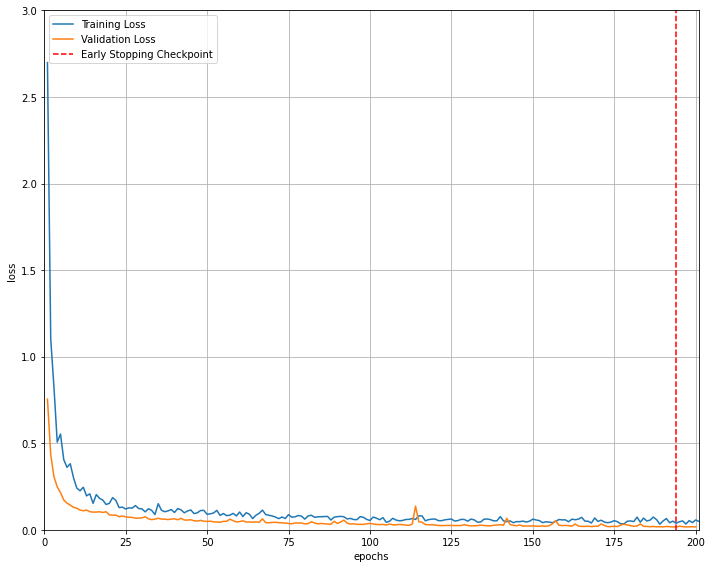

In [ ]:
# visualize the loss as the network trained
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_losses)+1),train_losses, label='Training Loss')
plt.plot(range(1,len(val_losses)+1),val_losses,label='Validation Loss')

# find position of lowest validation loss
minposs = val_losses.index(min(val_losses))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 3) # consistent scale
plt.xlim(0, len(val_losses)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [ ]:
test_loss = test(last_model, device, test_loader)

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_


Test set: Average loss: 0.0164, Precision: 0.9361, Recall: 0.9160, F1 score: 0.9235,   Accuracy: 9049/9337 (97%)



/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


(13.5, -0.5)

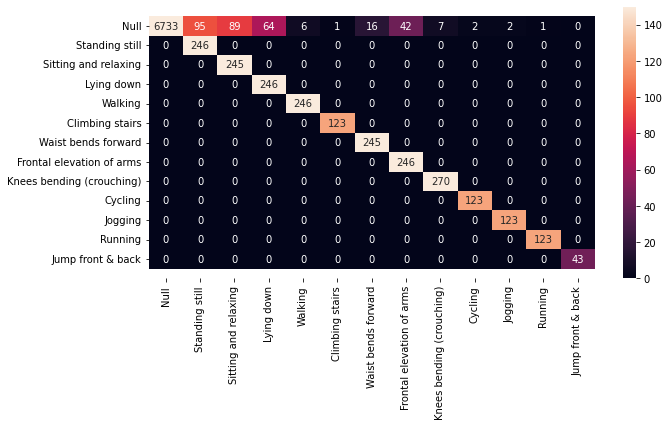

In [ ]:
nb_classes = 13

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.float()
        classes = classes.float()
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1



import pandas as pd
import seaborn as sn
array=np.array(confusion_matrix)

gestures=["Null", "Standing still", "Sitting and relaxing", "Lying down", "Walking", "Climbing stairs", "Waist bends forward", "Frontal elevation of arms", "Knees bending (crouching)", "Cycling", "Jogging", "Running", "Jump front & back"]

df_cm = pd.DataFrame(array, index = [i for i in gestures],
                  columns = [i for i in gestures])
# display(df_cm)
plt.figure(figsize = (10, 5))
ax = sn.heatmap(df_cm, vmin=0, vmax=150, annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
for ii in last_model.parameters():
    print(ii.shape)

NameError: name 'last_model' is not defined